<a href="https://colab.research.google.com/github/rbellidomatias-spec/Summer26-data-bootcamp/blob/main/Simulador_Macro_ISLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 📊 SIMULADOR MACROECONÓMICO IS-LM ---
Creado por Matías Rodrigo Bellido - Conectemos: www.linkedin.com/in/matiasbellido
---------------------------------------------
INGRESA LOS VALORES DE POLÍTICA:
 Gasto Público (G): 300
 Oferta Monetaria (M): 2000


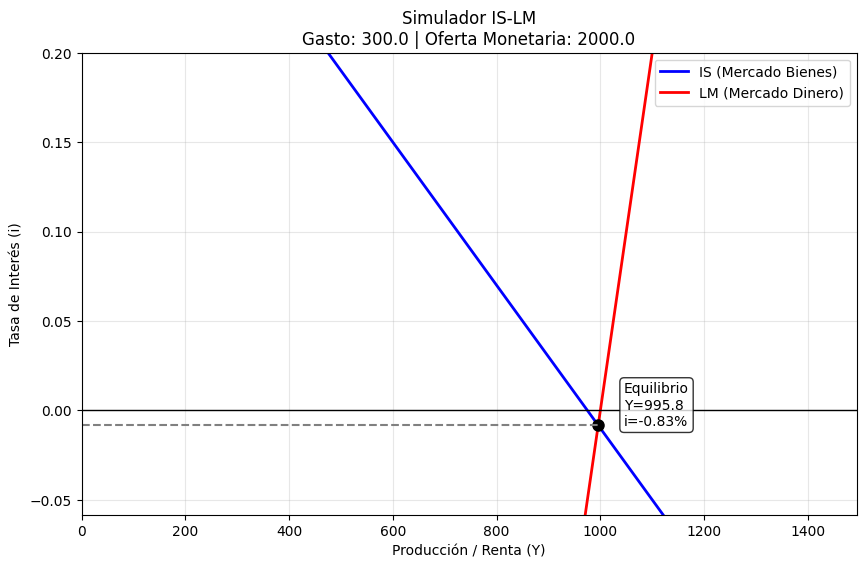


✅ RESULTADO: El PBI de equilibrio es 995.83 y la Tasa es -0.83%
¿Te sirvió? Conectemos en LinkedIn para más Data + Macro: www.linkedin.com/in/matiasbellido


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def calculadora_islm():
    print("--- 📊 SIMULADOR MACROECONÓMICO IS-LM ---")
    print("Creado por Matías Rodrigo Bellido - Conectemos: www.linkedin.com/in/matiasbellido")
    print("-" * 45)

    print("INGRESA LOS VALORES DE POLÍTICA:")
    try:
        G_user = float(input(" Gasto Público (G): ") or 300) #or ==> valor por defecto (el que yo recomiendo)
        M_user = float(input(" Oferta Monetaria (M): ") or 1600) #Si no le agregas valores y simplemente queres probar la calculadora rapido, py va a utilizar los valores por default
    except ValueError:
        print("Error: Ingresa números válidos.")
        return

    # Parámetros Fijos (Estructurales)
    c1 = 0.6     # Propensión a consumir
    T = 100      # Impuestos
    I0 = 150     # Inversión autónoma
    b = 1000     # Sensibilidad Inversión
    P = 1        # Precios
    d1 = 2       # Demanda dinero (Y)
    d2 = 1000    # Demanda dinero (i)
    #Estos valores si queres los podes cambiar dependiendo el ejercicio propuesto.

    # -------------------------------------------------------------------------
    # 🧠 CAMBIO CLAVE: Calculamos el equilibrio ANTES de graficar
    # Esto es necesario para saber qué tamaño debe tener el gráfico (Centrado dinámico)
    # -------------------------------------------------------------------------

    # 1. Solución Exacta (Matricial)
    A_autonomo = I0 + G_user - c1*T

    Matriz_A = np.array([[1-c1, b], [d1, -d2]])
    Vector_B = np.array([A_autonomo, M_user/P])

    try:
        solucion = np.linalg.solve(Matriz_A, Vector_B)
        Y_eq, i_eq = solucion
    except:
        print("No hay solución (las curvas son paralelas).")
        return

    # 2. Rango de Ingreso (Y) - DINÁMICO
    # Ahora el eje X se adapta: va desde 0 hasta un 50% más del equilibrio
    max_Y_visual = Y_eq * 1.5
    if max_Y_visual < 100: max_Y_visual = 1000 # Seguridad por si da muy chico

    Y = np.arange(0, max_Y_visual, 10)

    # 3. Ecuaciones para las curvas (usando el nuevo rango Y)
    # Curva IS: i = (A - (1-c1)Y) / b
    i_IS = (A_autonomo - (1-c1)*Y) / b

    # Curva LM: i = (d1*Y - M/P) / d2
    i_LM = (1/d2) * (d1*Y - M_user/P)

    # 4. Graficar (CON ESCALA AUTOMÁTICA)
    plt.figure(figsize=(10, 6))

    # Graficar curvas
    plt.plot(Y, i_IS, label='IS (Mercado Bienes)', color='blue', linewidth=2)
    plt.plot(Y, i_LM, label='LM (Mercado Dinero)', color='red', linewidth=2)

    # Marcar equilibrio
    plt.plot(Y_eq, i_eq, 'ko', markersize=8)

    # Líneas punteadas (Ahora usan min/max para verse bien aunque la tasa sea negativa)
    plt.vlines(Y_eq, min(0, i_eq), i_eq, linestyles='dashed', colors='grey')
    plt.hlines(i_eq, 0, Y_eq, linestyles='dashed', colors='grey')

    # Texto del equilibrio
    plt.text(Y_eq * 1.05, i_eq, f'Equilibrio\nY={round(Y_eq,1)}\ni={round(i_eq*100, 2)}%',
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

    plt.title(f'Simulador IS-LM\nGasto: {G_user} | Oferta Monetaria: {M_user}')
    plt.xlabel('Producción / Renta (Y)')
    plt.ylabel('Tasa de Interés (i)')

    # --- AJUSTE DE EJES INTELIGENTE ---
    plt.xlim(0, max_Y_visual)

    # El eje Y se ajusta solo:
    # Si la tasa es negativa (ej -10%), el gráfico baja. Si es positiva, el piso es 0.
    piso_grafico = min(0, i_eq - 0.05)
    techo_grafico = max(0.20, i_eq + 0.10) # Siempre deja un margen arriba

    plt.ylim(piso_grafico, techo_grafico)

    plt.axhline(0, color='black', linewidth=1) # Marca el eje 0 fuerte
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"\n✅ RESULTADO: El PBI de equilibrio es {round(Y_eq, 2)} y la Tasa es {round(i_eq*100, 2)}%")
    print("¿Te sirvió? Conectemos en LinkedIn para más Data + Macro: www.linkedin.com/in/matiasbellido")

# Ejecutar
calculadora_islm()